In [ ]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 정보
## 이 데이터는 2006년 미국 뉴욕주 사라토가 카운티(Saratoga County)의 주택에 관한 정보를 담고 있습니다. 데이터셋의 형식은 데이터 프레임(data frame)이며, 총 1728개의 관측값과 16개의 변수가 있습니다. 여기에는 다음과 같은 변수가 포함되어 있습니다:


| 변수명          | 설명                               |
|----------------|------------------------------------|
| price          | 가격 (미국 달러)                   |
| lotSize        | 부지의 크기 (에이커)              |
| age            | 주택의 연식 (년)                   |
| landValue      | 토지 가치 (미국 달러)              |
| livingArea     | 거실 면적 (평방 피트)            |
| pctCollege     | 대학 졸업자 비율 (%)              |
| bedrooms       | 침실 수                           |
| fireplaces     | 벽난로 수                         |
| bathrooms      | 화장실 수 (하프 화장실은 샤워나 욕조가 없음) |
| rooms          | 방 수                             |
| heating        | 난방 시스템 종류                  |
| fuel           | 난방용 연료                       |
| sewer          | 하수도 시스템 종류                |
| waterfront     | 부동산에 해안이 포함되어 있는지 여부 |
| newConstruction | 부동산이 신축인지 여부            |
| centralAir     | 집에 중앙 에어컨이 있는지 여부     |


In [ ]:
houses_data = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData")
houses = houses_data.data     # data

houses.head(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.00,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.50,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.00,8,hot water/steam,gas,public/commercial,No,No,No


In [ ]:
print(houses_data.__doc__)  # documents

.. container::

   ============== ===============
   SaratogaHouses R Documentation
   ============== ===============

   .. rubric:: Houses in Saratoga County (2006)
      :name: SaratogaHouses

   .. rubric:: Description
      :name: description

   Data on houses in Saratoga County, New York, USA in 2006

   .. rubric:: Usage
      :name: usage

   .. code:: R

      data(SaratogaHouses)

   .. rubric:: Format
      :name: format

   A data frame with 1728 observations on the following 16 variables.

   -  ``price`` price (US dollars)

   -  ``lotSize`` size of lot (acres)

   -  ``age`` age of house (years)

   -  ``landValue`` value of land (US dollars)

   -  ``livingArea`` living are (square feet)

   -  ``pctCollege`` percent of neighborhood that graduated college

   -  ``bedrooms`` number of bedrooms

   -  ``fireplaces`` number of fireplaces

   -  ``bathrooms`` number of bathrooms (half bathrooms have no shower
      or tub)

   -  ``rooms`` number of rooms

   -  ``heating

In [ ]:
# 데이터 정보 확인
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [ ]:
# 데이터 요약 통계량 확인
houses.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,0.60,1.90,7.04
std,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.56,0.66,2.32
...,...,...,...,...,...,...,...,...,...,...
50%,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,1.00,2.00,7.00
75%,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,1.00,2.50,8.25
max,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.00,4.50,12.00


# Variation (변동성, 변량, 분산도)
## 대상들을 측정함 따라 값이 변화하는 경향성

In [ ]:
houses.value_counts("price").head(15)

price
225000    21
120000    21
150000    21
          ..
125000    13
175000    13
140000    12
Name: count, Length: 15, dtype: int64

In [ ]:
houses['lotSize'].value_counts().head(15)
#

lotSize
0.46    85
0.15    74
0.16    72
        ..
0.47    31
0.07    30
0.06    30
Name: count, Length: 15, dtype: int64

price
150000    21
225000    21
120000    21
155000    19
195000    18
Name: count, dtype: int64


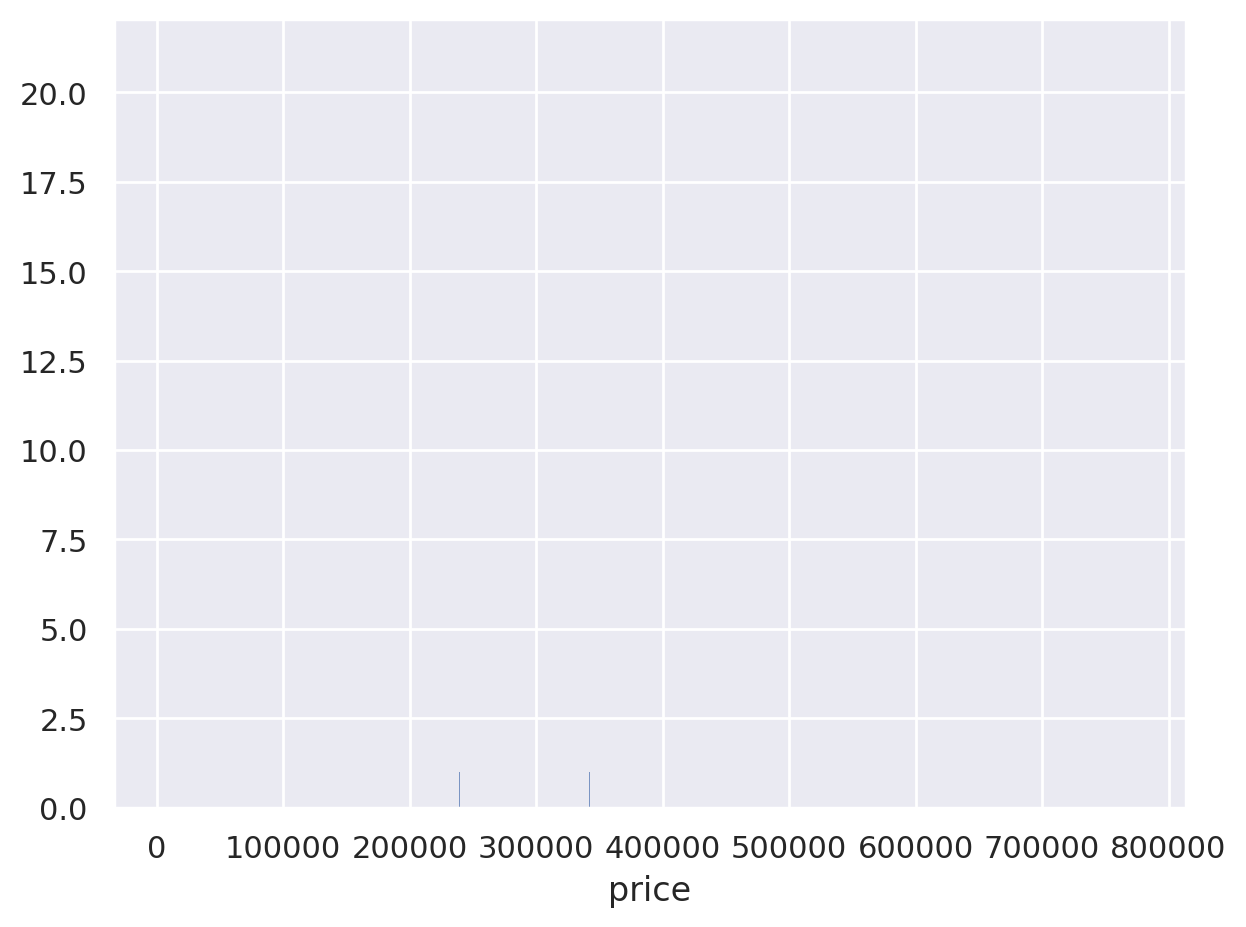

In [ ]:
numeric_list = ['price']

for numeric in numeric_list:
    print(houses[numeric].value_counts().head())
    (
        so.Plot(houses, x = numeric)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

lotSize
0.46    85
0.15    74
0.16    72
1.00    64
0.17    41
Name: count, dtype: int64


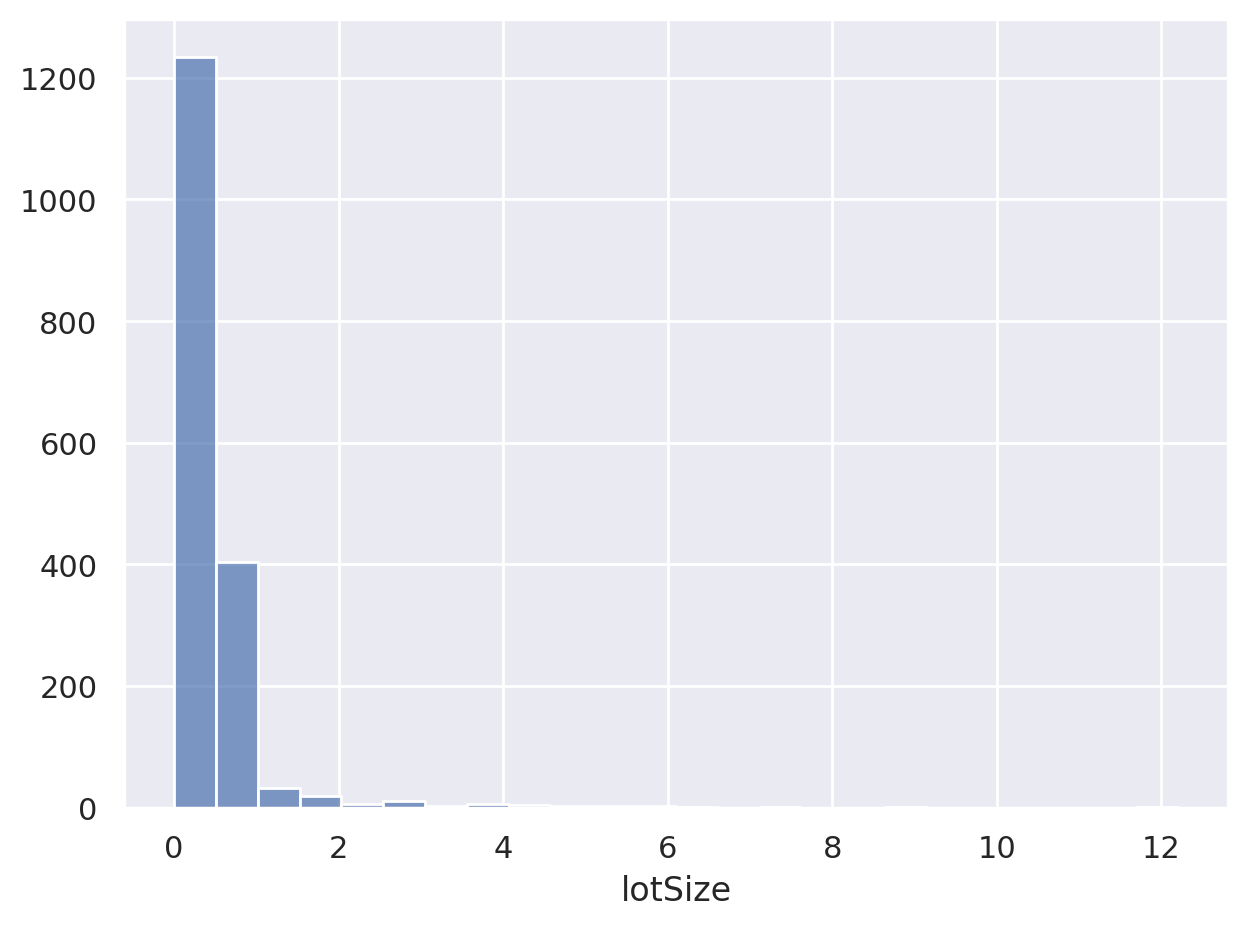

age
19    93
16    88
18    88
0     83
1     75
Name: count, dtype: int64


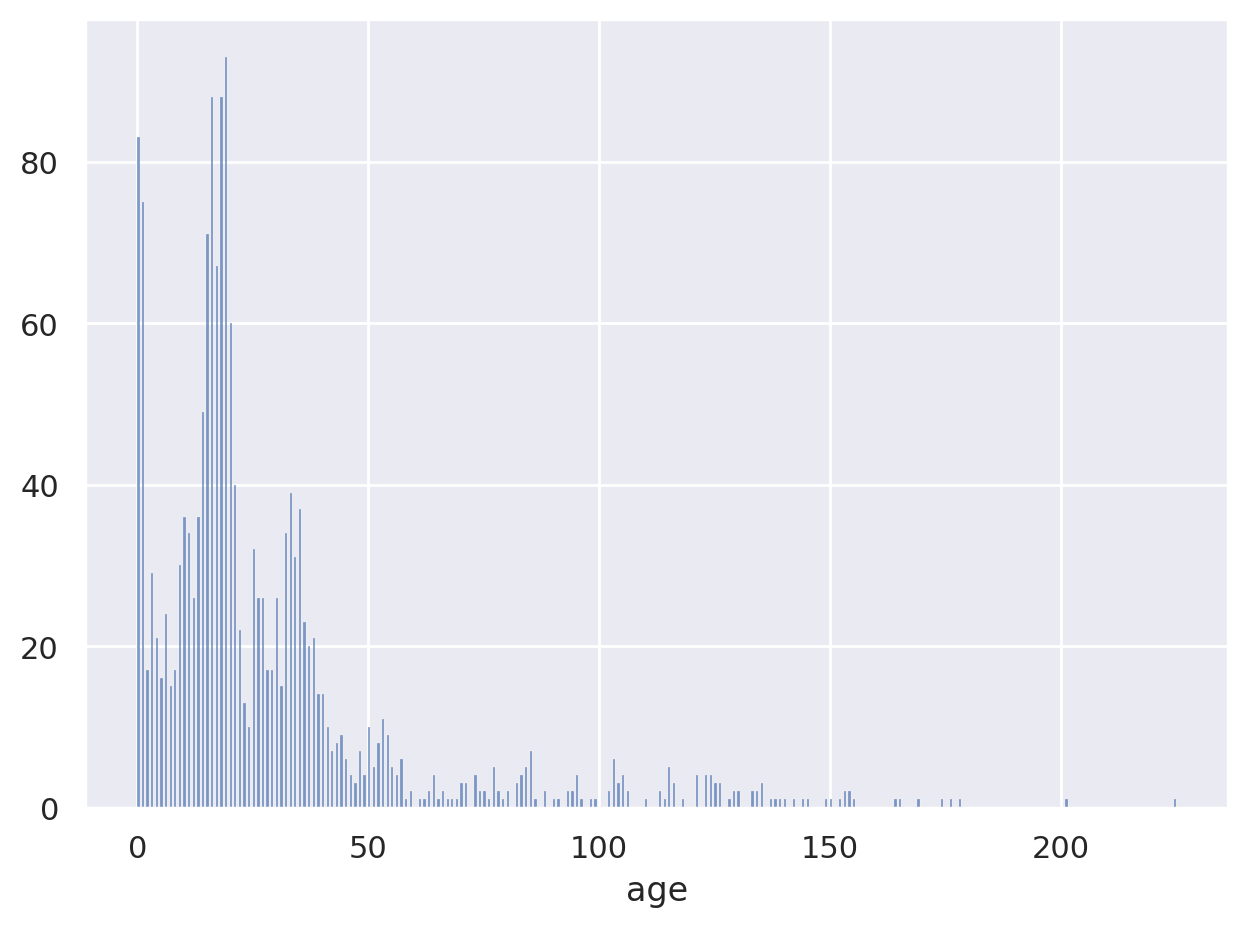

livingArea
1480    49
912     40
2310    16
960     15
1184    14
Name: count, dtype: int64


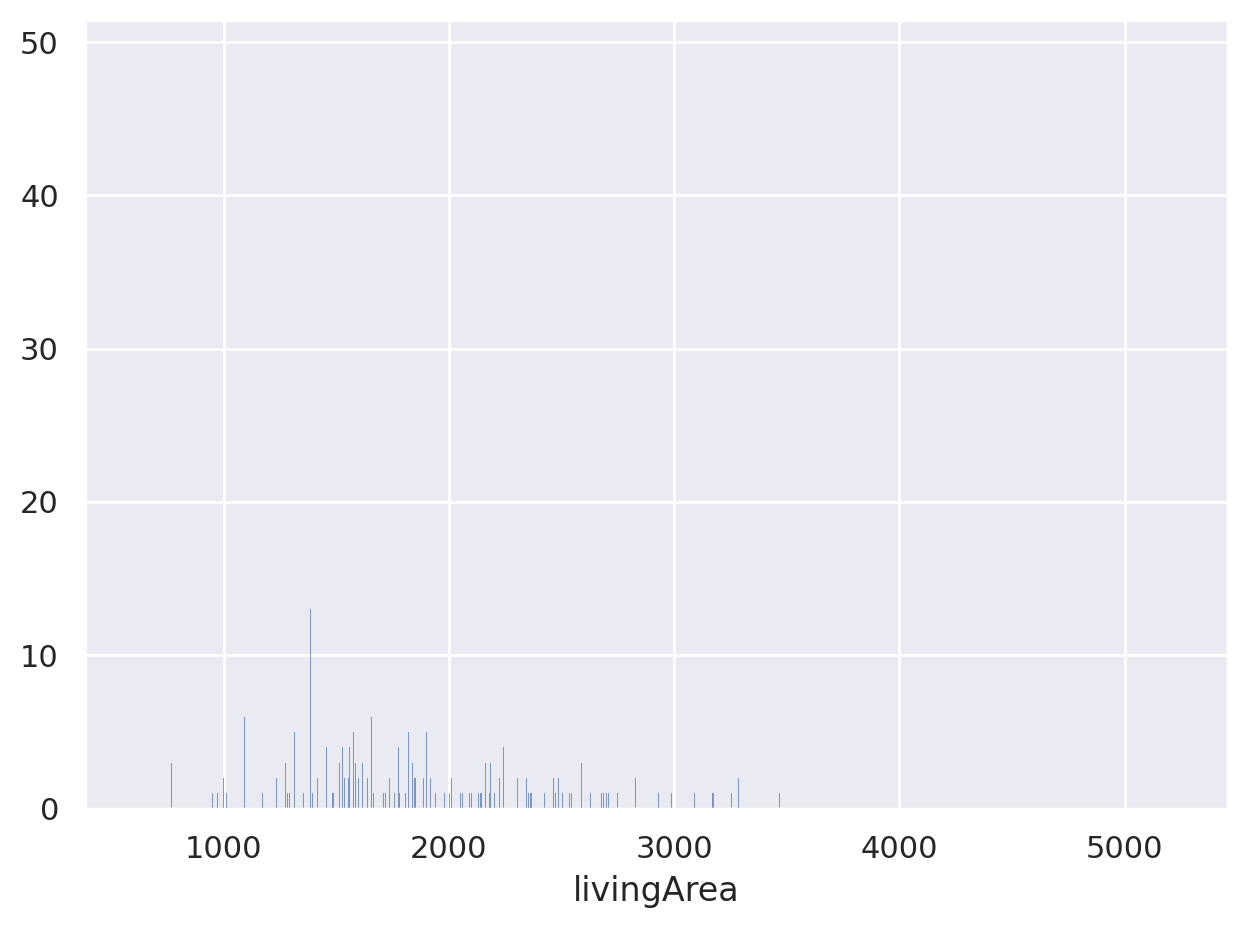

pctCollege
64    405
57    272
63    195
62    133
40    128
Name: count, dtype: int64


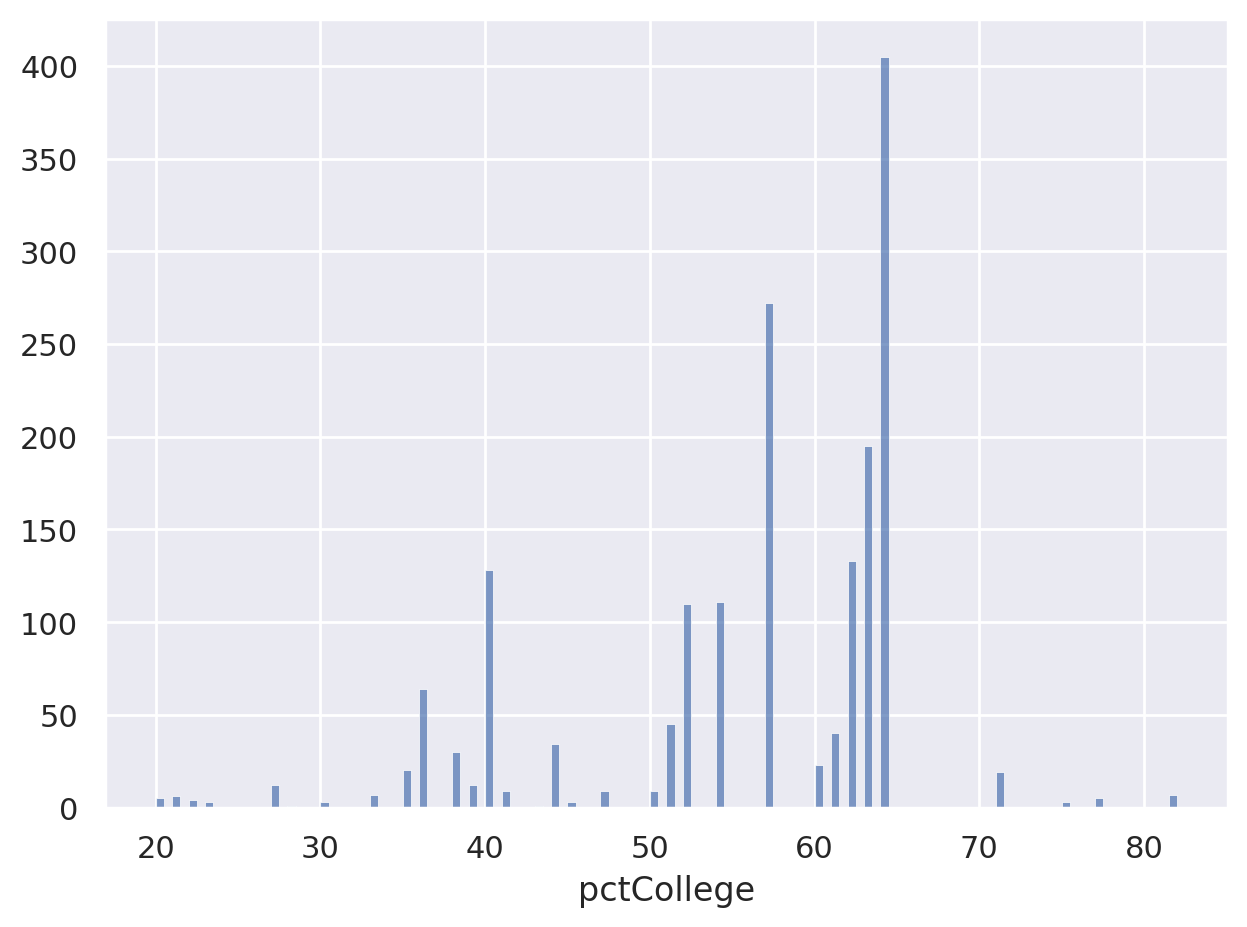

bedrooms
3    822
4    487
2    348
5     53
6      8
Name: count, dtype: int64


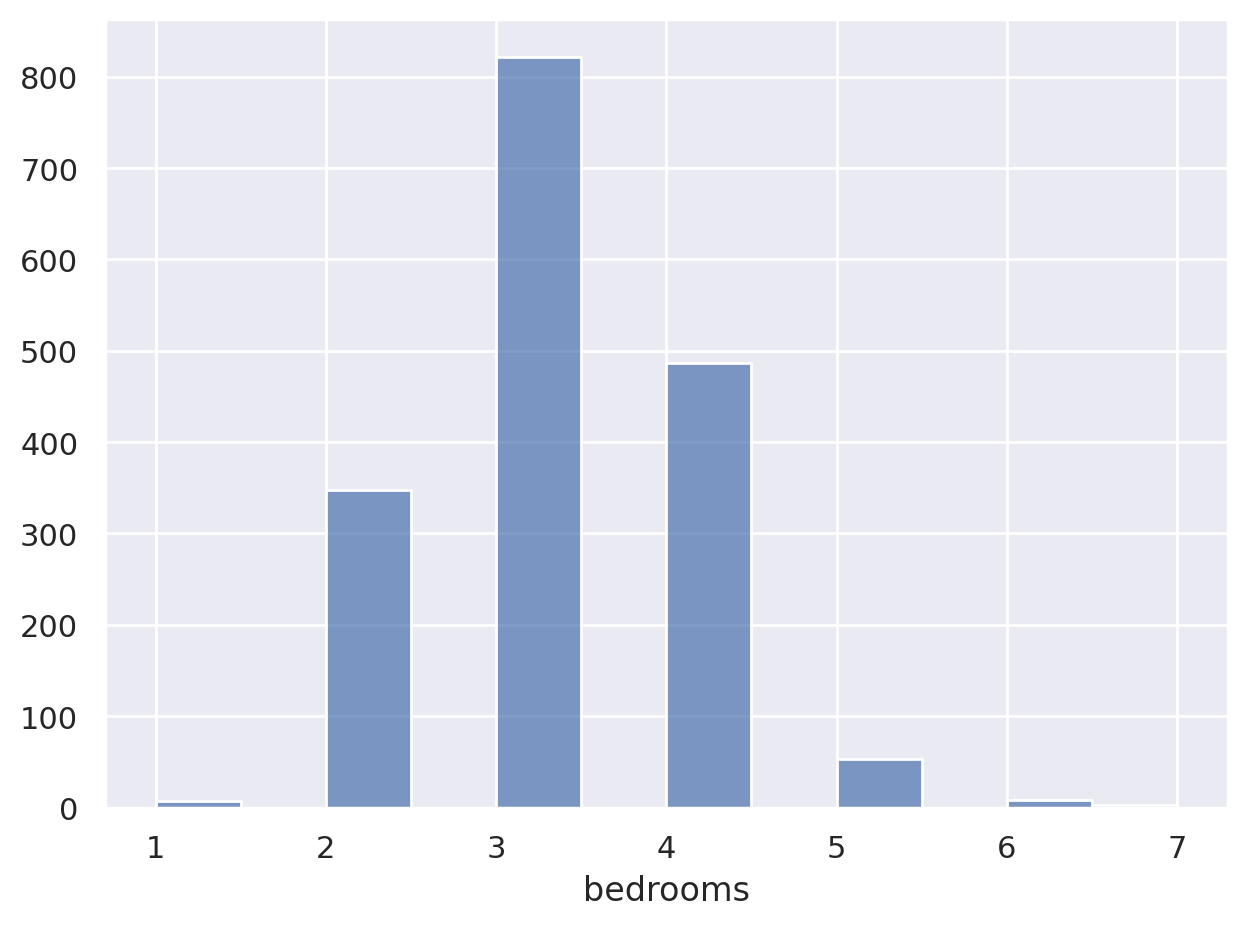

fireplaces
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64


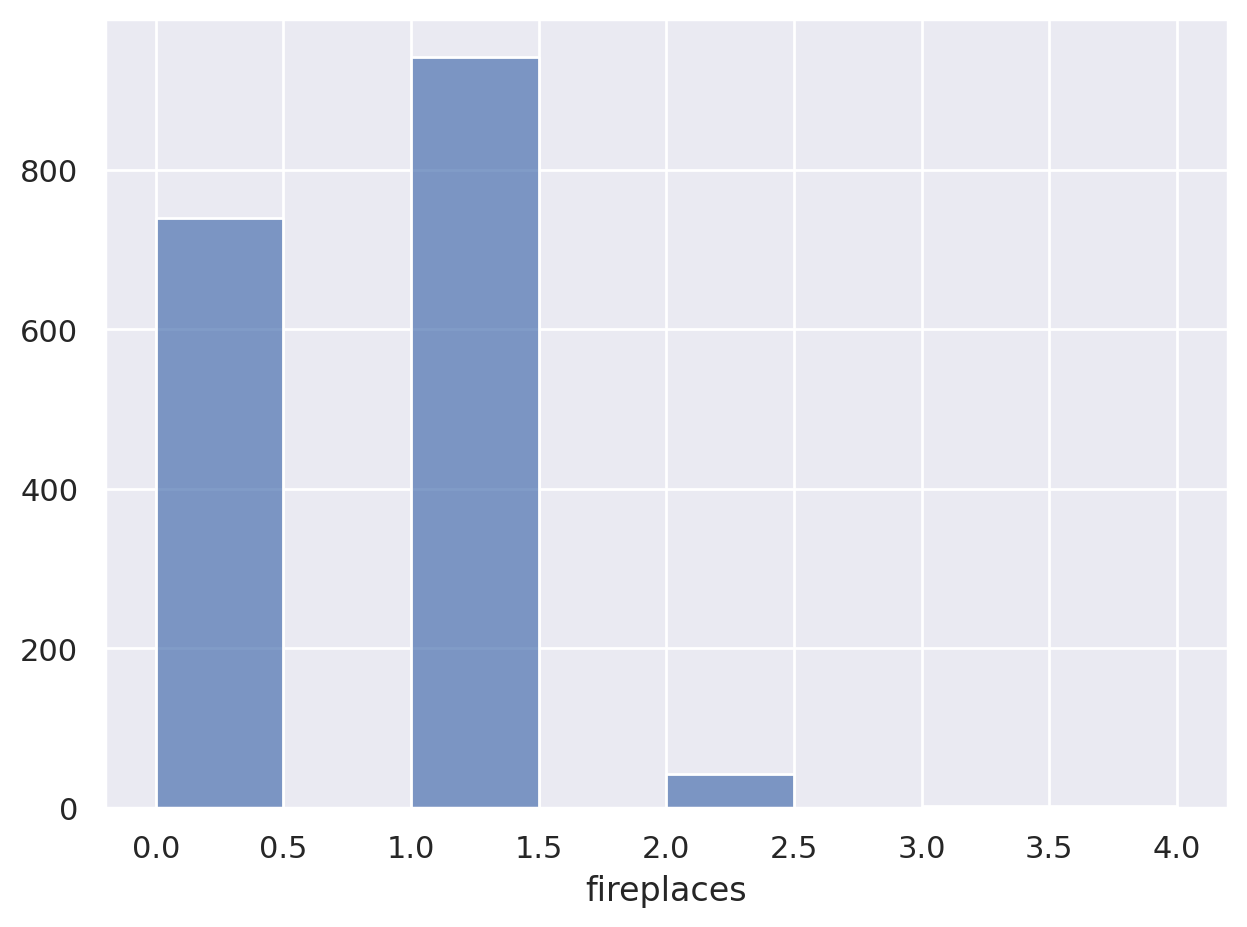

bathrooms
2.50    549
1.50    497
1.00    325
2.00    255
3.00     56
Name: count, dtype: int64


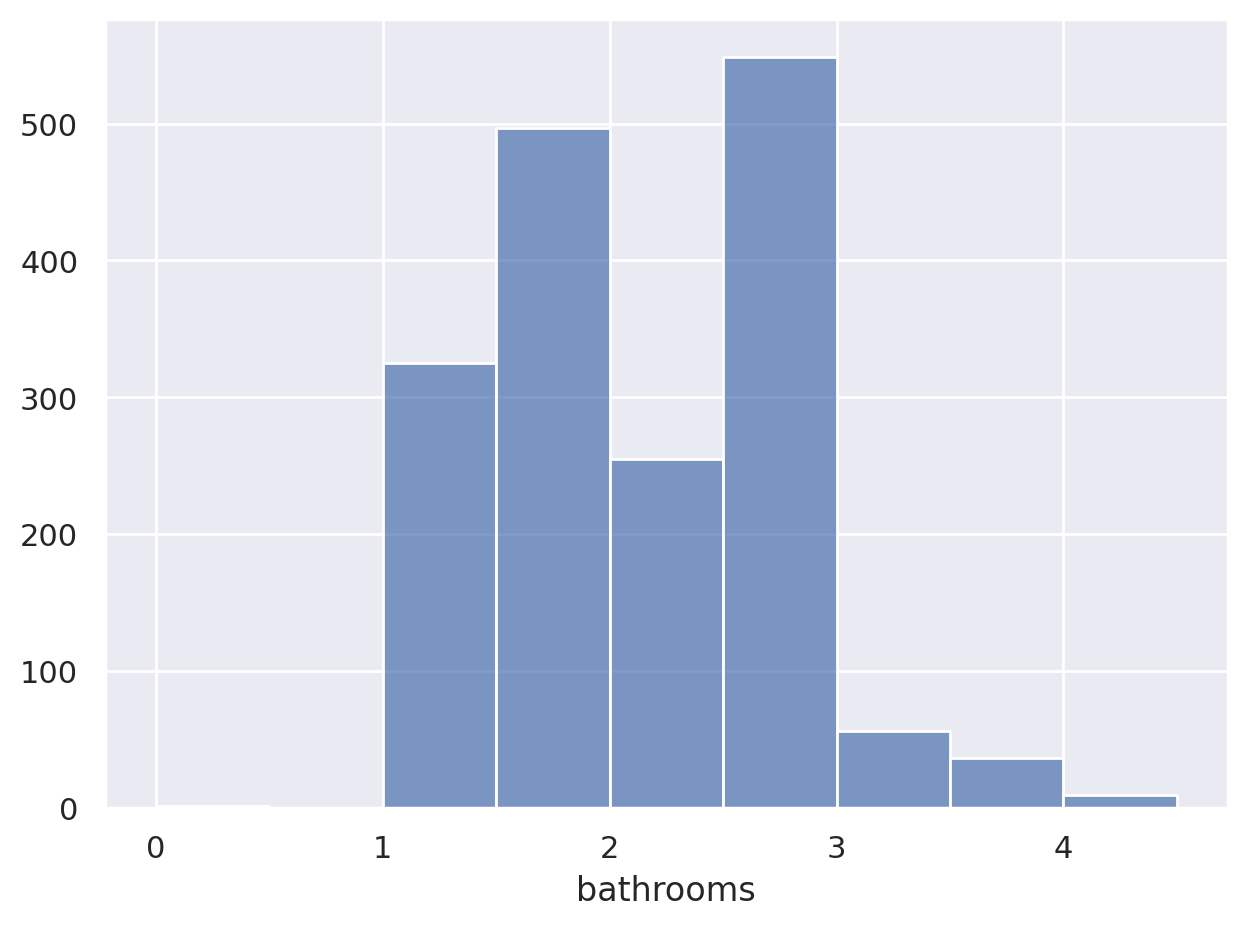

rooms
7    305
8    258
6    247
5    223
4    181
Name: count, dtype: int64


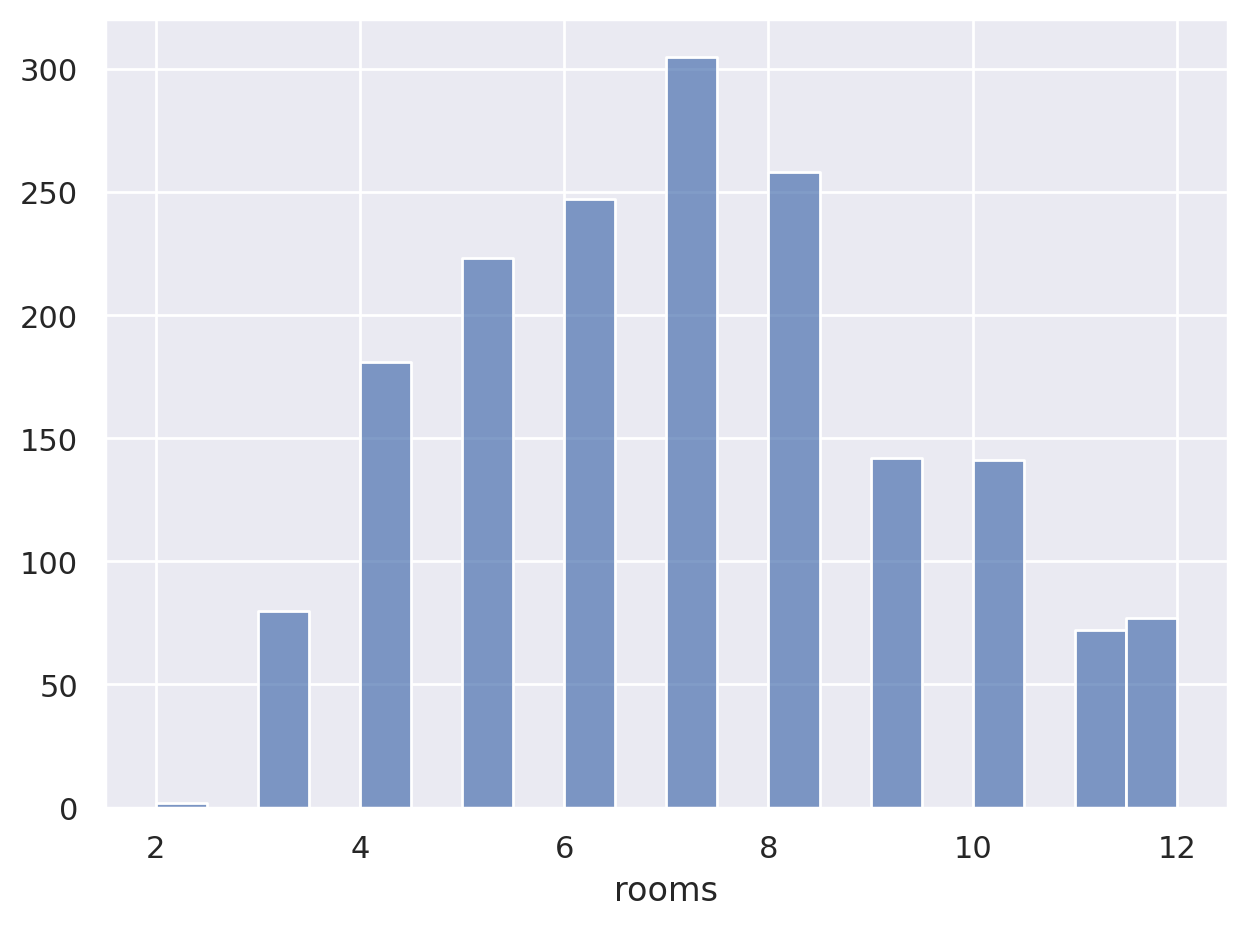

In [ ]:
numeric_list = ['lotSize', 'age', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

for numeric in numeric_list:
    print(houses[numeric].value_counts().head())
    (
        so.Plot(houses, x = numeric)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

## Variation: Numeric variables (상위 5개 분포만)
### 부지의 크기(lotSize) 그 분포는 어떠한가?
#### 0.46: 85 / 0.15: 74 / 0.16: 72 / 1.00: 64 / 0.17: 41
### 주택의 연식(age) 그 분포는 어떠한가?
#### 19: 93 / 16: 88 / 18: 88 / 0: 83 / 1: 75
### 토지 가치(landValue) 그 분포는 어떠한가?
####
### 거실 면적(livingArea) 그 분포는 어떠한가?
#### 1480: 49 / 912: 40 / 2310: 16 / 960: 15 / 1184: 14
### 대학 졸업자 비율(pctCollege) 그 분포는 어떠한가?
####
### 침실 수(bedrooms) 그 분포는 어떠한가?
####
### 벽난로 수(fireplaces) 그 분포는 어떠한가?
####
### 화장실 수(bathrooms) 그 분포는 어떠한가?
####
### 방 수(rooms) 그 분포는 어떠한가?
####

heating
hot air            1121
electric            305
hot water/steam     302
Name: count, dtype: int64


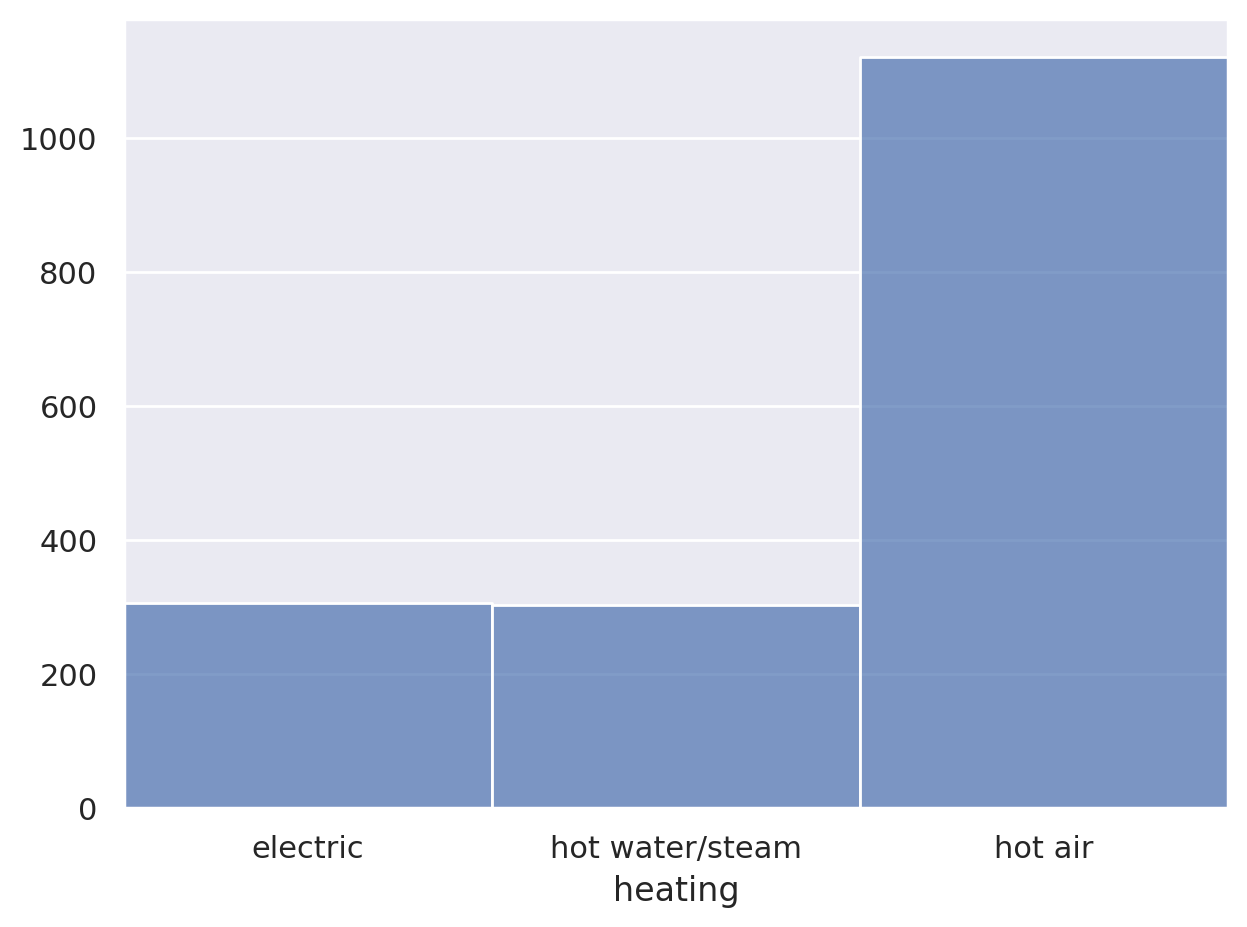

fuel
gas         1197
electric     315
oil          216
Name: count, dtype: int64


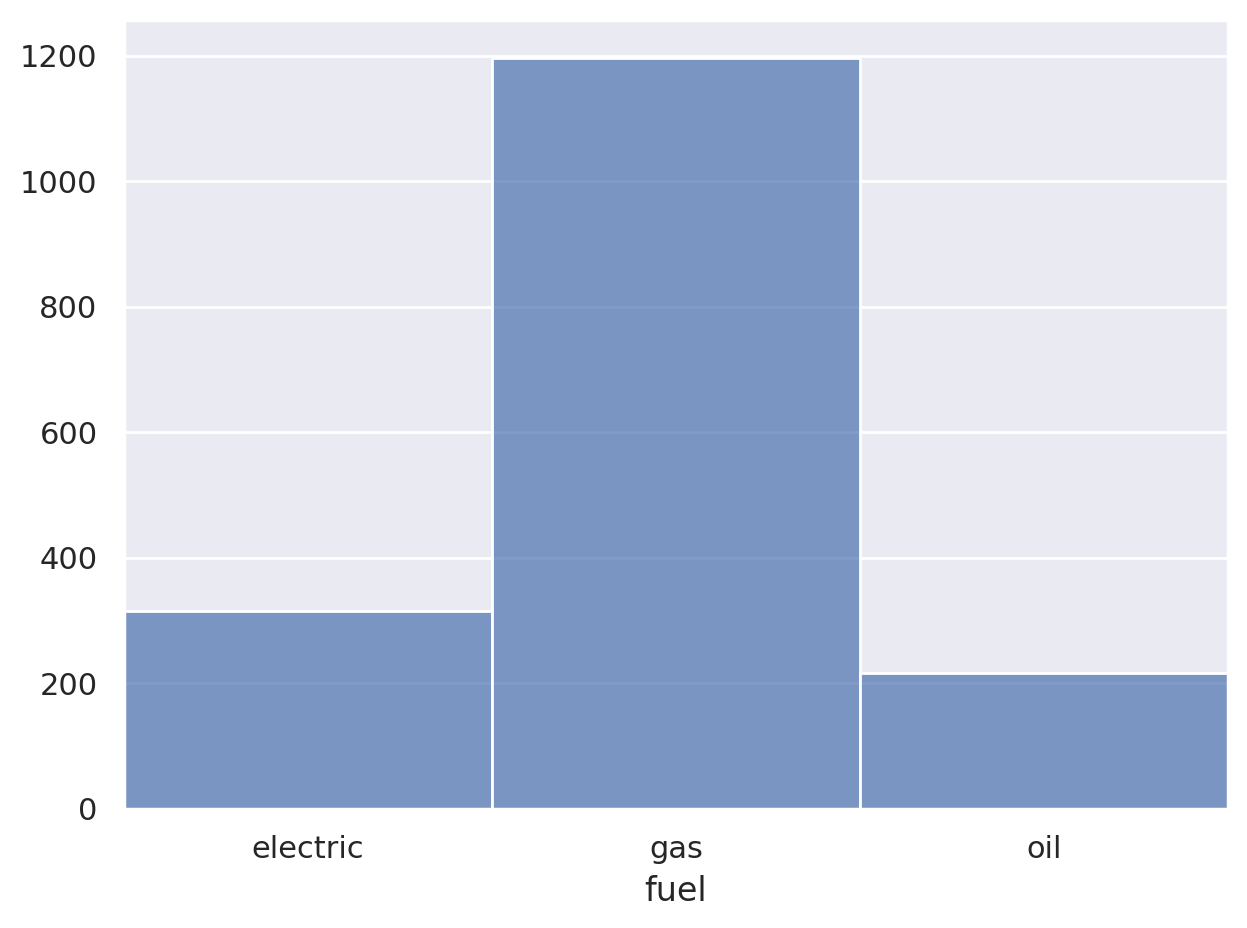

sewer
public/commercial    1213
septic                503
none                   12
Name: count, dtype: int64


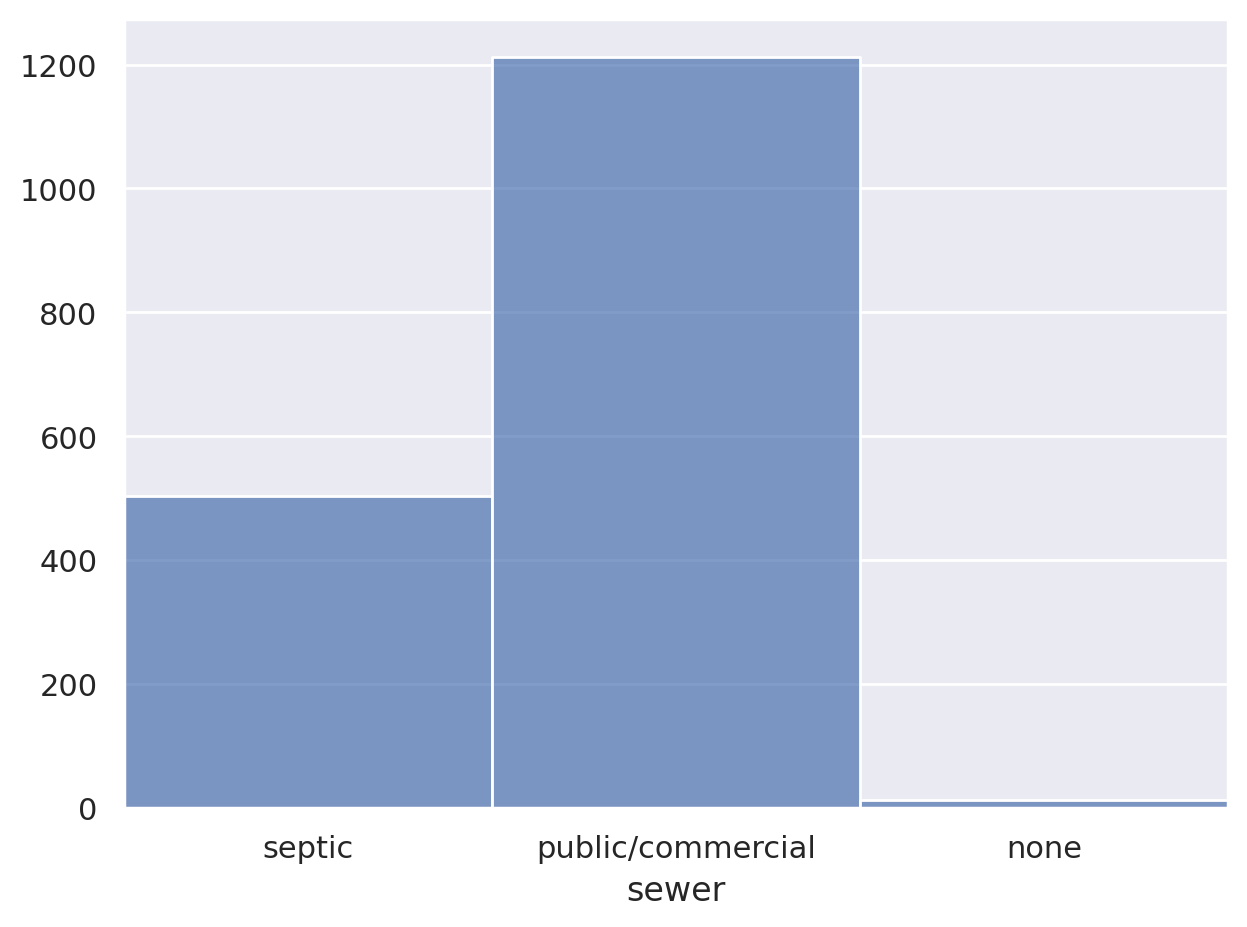

waterfront
No     1713
Yes      15
Name: count, dtype: int64


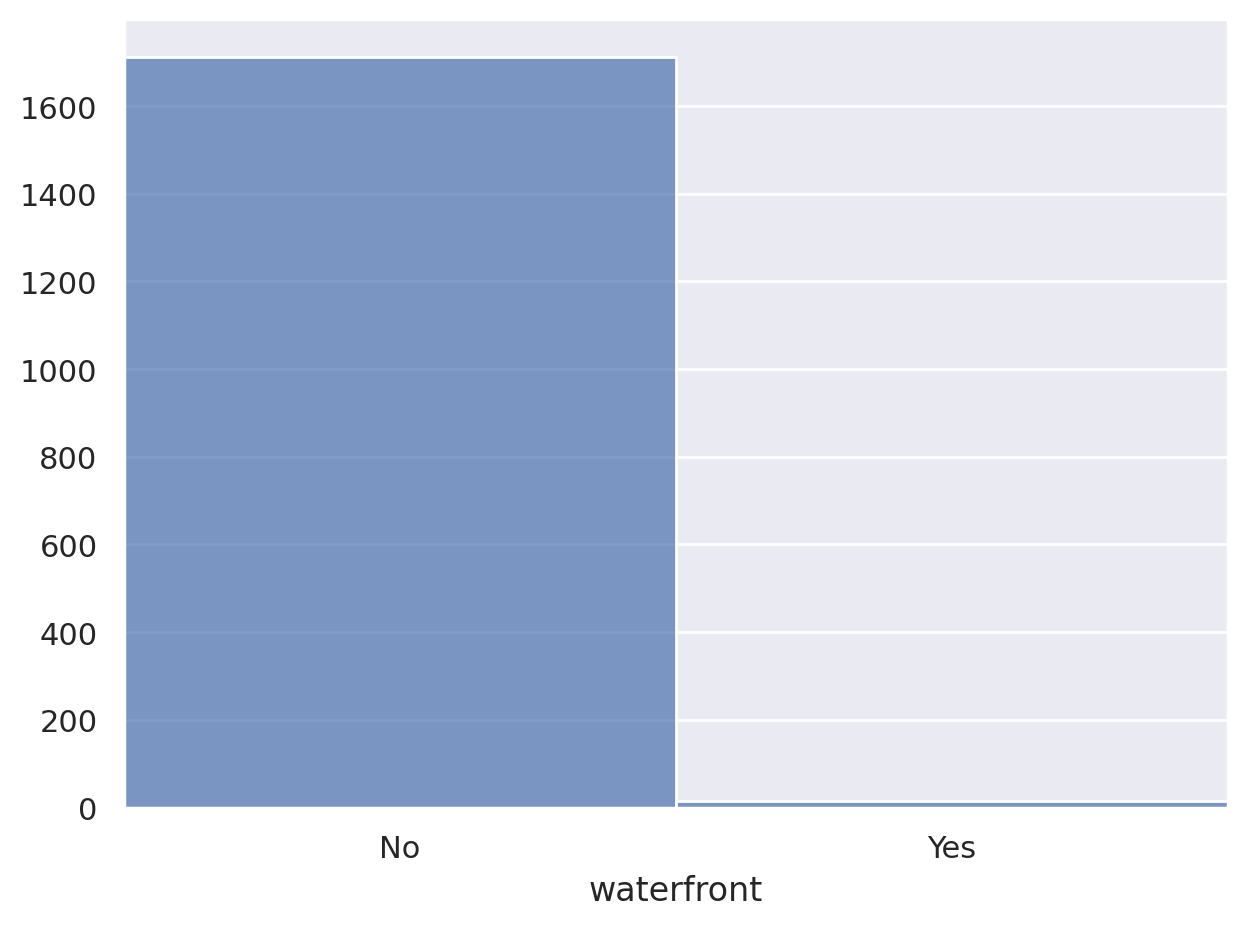

newConstruction
No     1647
Yes      81
Name: count, dtype: int64


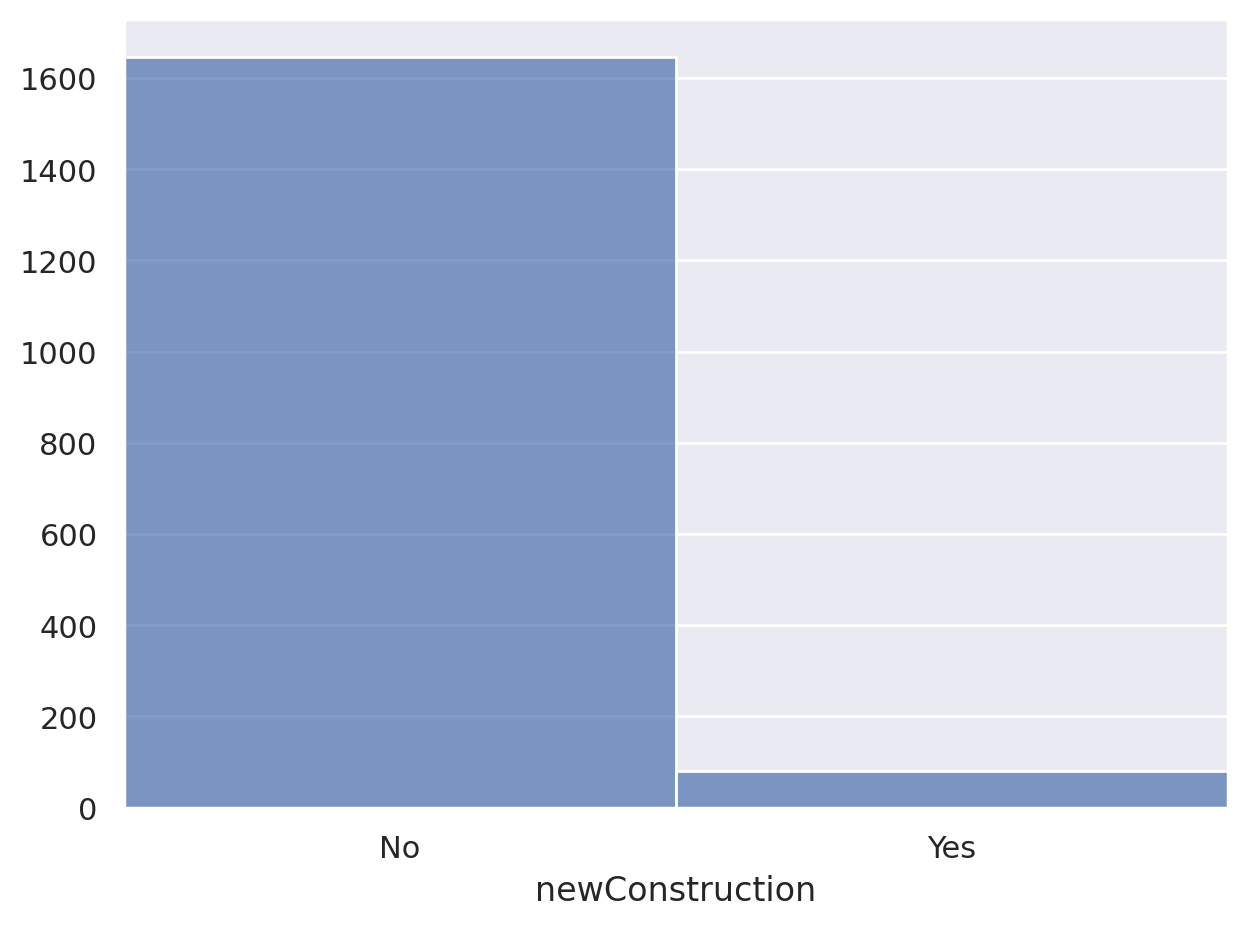

centralAir
No     1093
Yes     635
Name: count, dtype: int64


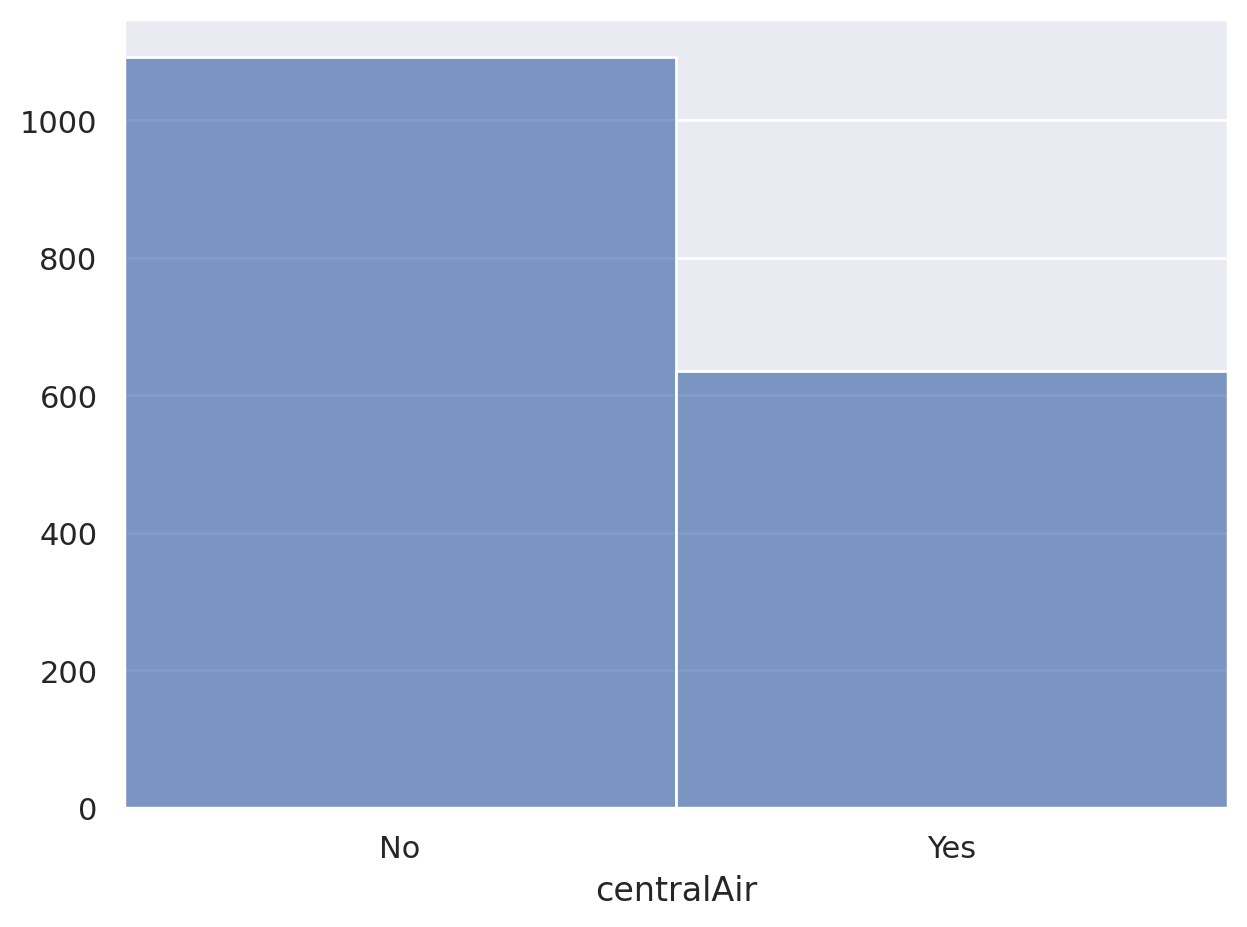

In [ ]:
categorical_list = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']

for categorical in categorical_list:
    print(houses[categorical].value_counts().head())
    (
        so.Plot(houses, x = categorical)
        .add(so.Bars(), so.Hist(binwidth=.5))
    ).show()

## Variation: Categorical variables
### 어떤 종류의 난방 시스템을 사용하며 그 분포는 어떠한가?
#### --> hot air 1121 / electric 305 / hot water,steam 302
### 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?
#### --> gas 1197 / electric 315 / oil 216
### 어떤 종류의 하수도 시스템을 사용하며 그 분포는 어떠한가?
#### --> public,commercial 1213 / septic 503 / none 12
### 부동산에 해안이 포함되어 있는지 여부는 그 분포가 어떠한가?
#### --> No 1713 / Yes 15
### 부동산이 신축인지 여부는 그 분포가 어떠한가?
#### --> No 1647 / Yes 81
### 집에 중앙 에어컨이 있는지 여부는 그 분포가 어떠한가?
#### --> No 1093 / Yes 635

fuel
gas         1197
electric     315
oil          216
Name: count, dtype: int64


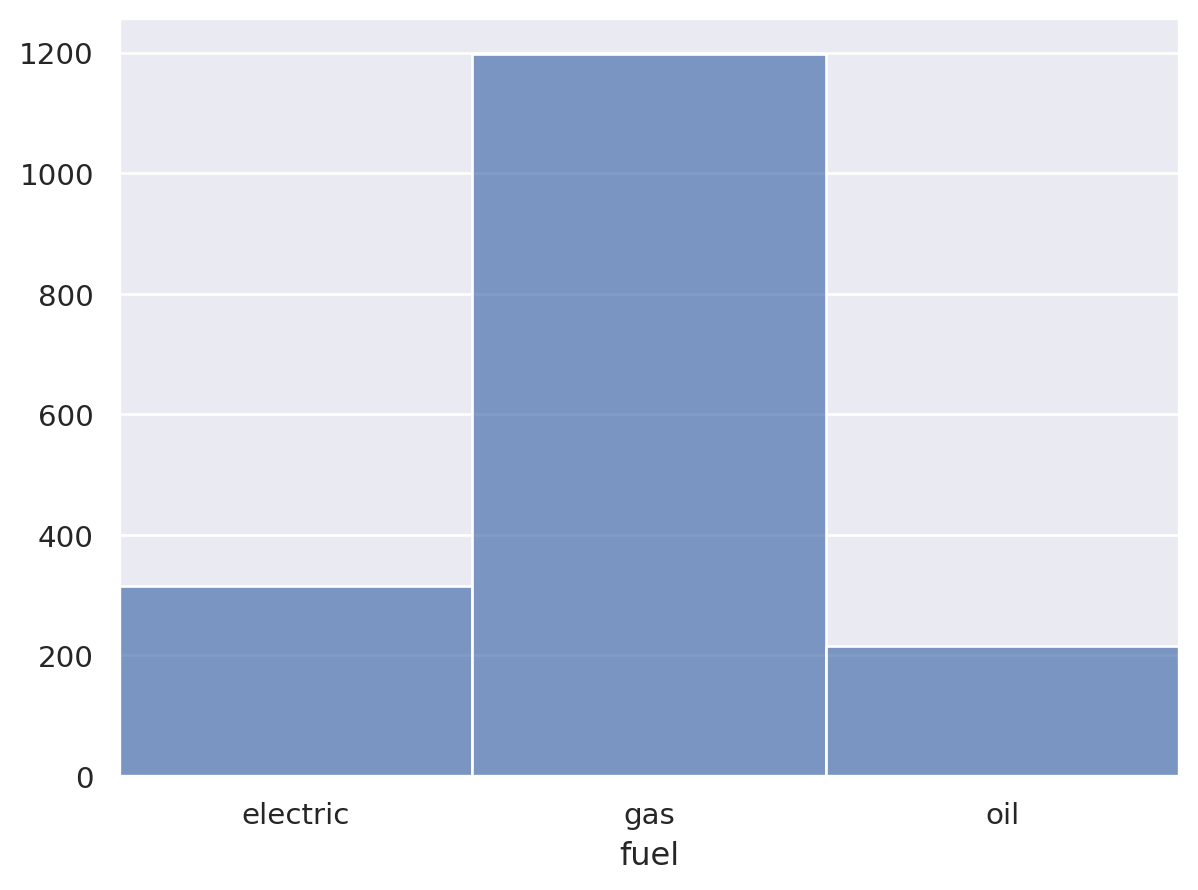

In [ ]:
# Variation: Categorical variables
# 어떤 종류의 연료를 사용하며 그 분포는 어떠한가?

print(houses.value_counts("fuel").head()) # fuel 별 개수 출력

(
    so.Plot(houses, x = 'fuel')
    .add(so.Bars(), so.Hist(binwidth=.5))
)

## gas 타입을 가장 많이 사용하며, electric, oil 순으로 사용한다.

heating
hot air            1121
electric            305
hot water/steam     302
Name: count, dtype: int64


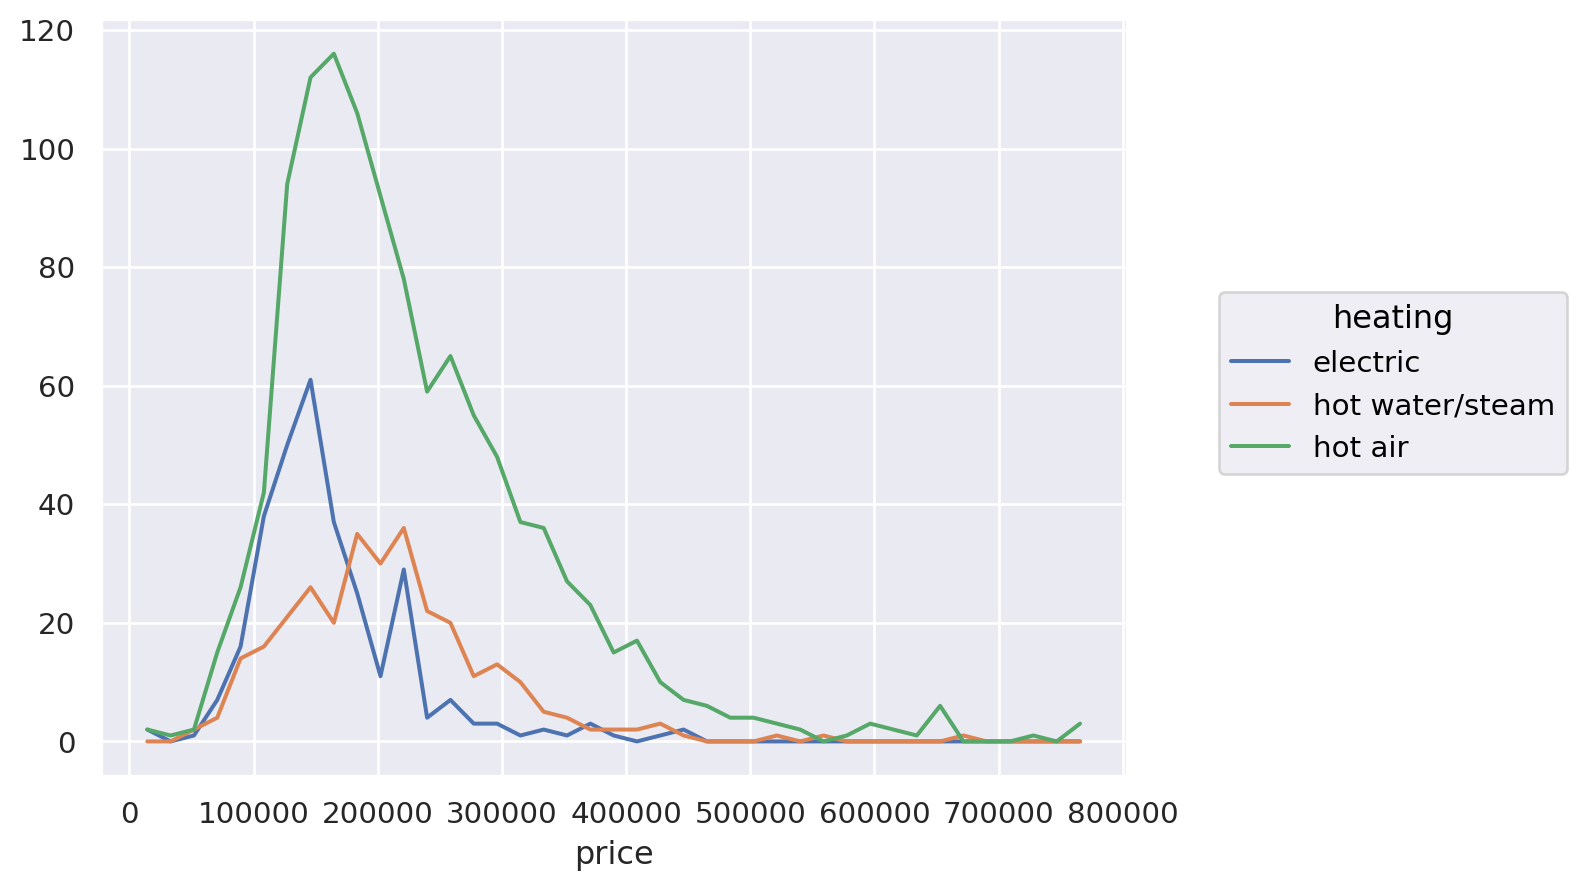

In [ ]:
print(houses.value_counts("heating").head()) # heating 별 개수

(
    so.Plot(houses, x="price", color="heating")
    .add(so.Line(), so.Hist())
)

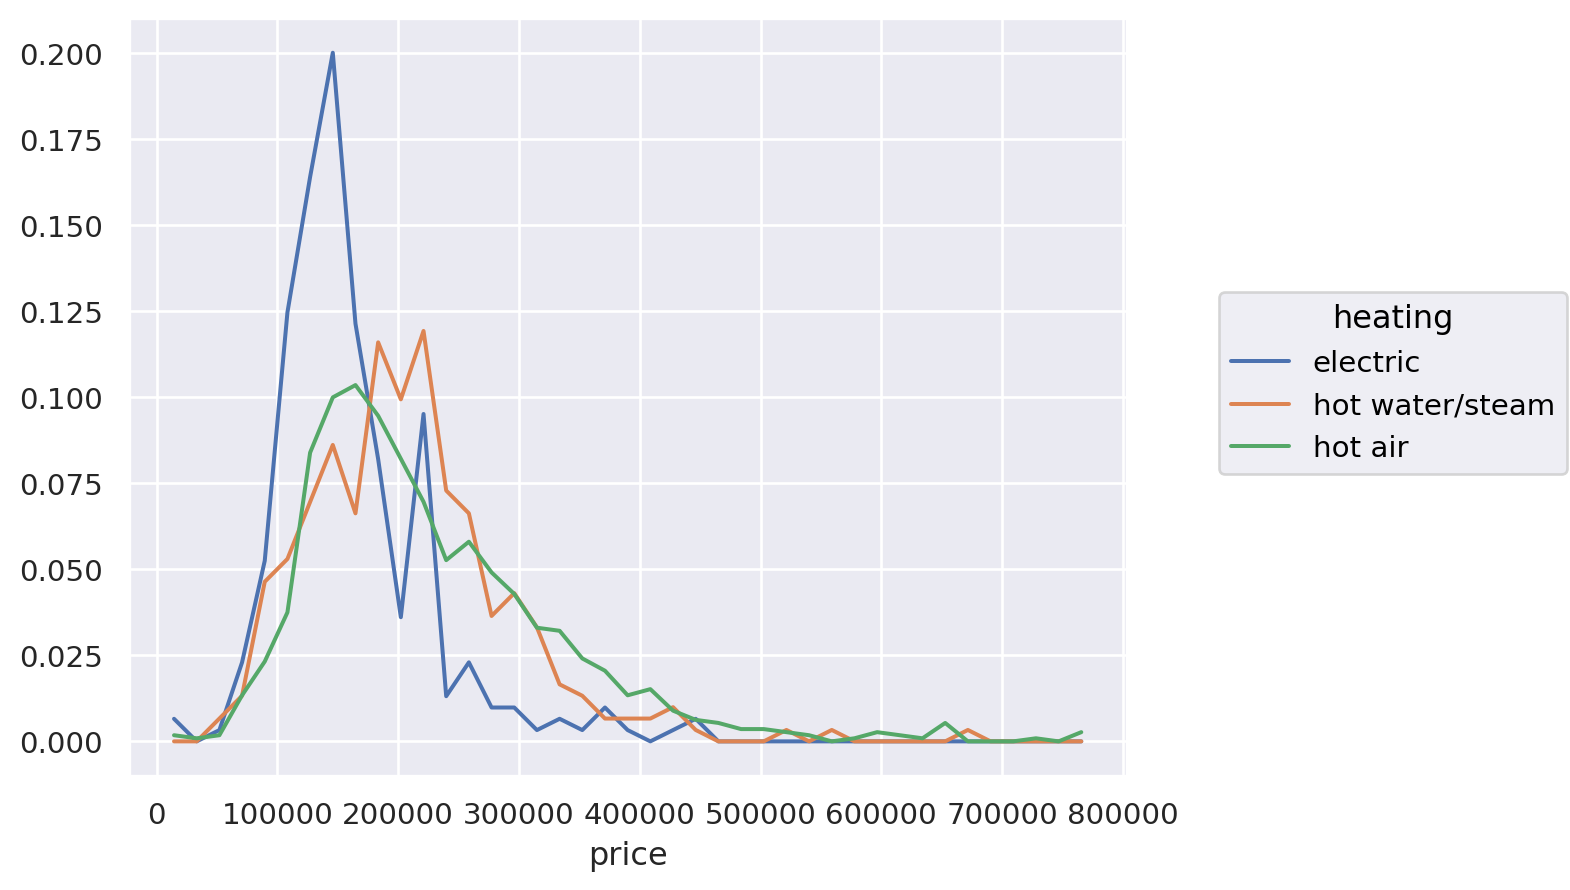

In [ ]:
# 각 cut 내에서의 분포가 cut마다 어떻게 다른가 확인
(
    so.Plot(houses, x="price", color="heating")
    .add(so.Line(), so.Hist(stat="proportion", common_norm=False))
)

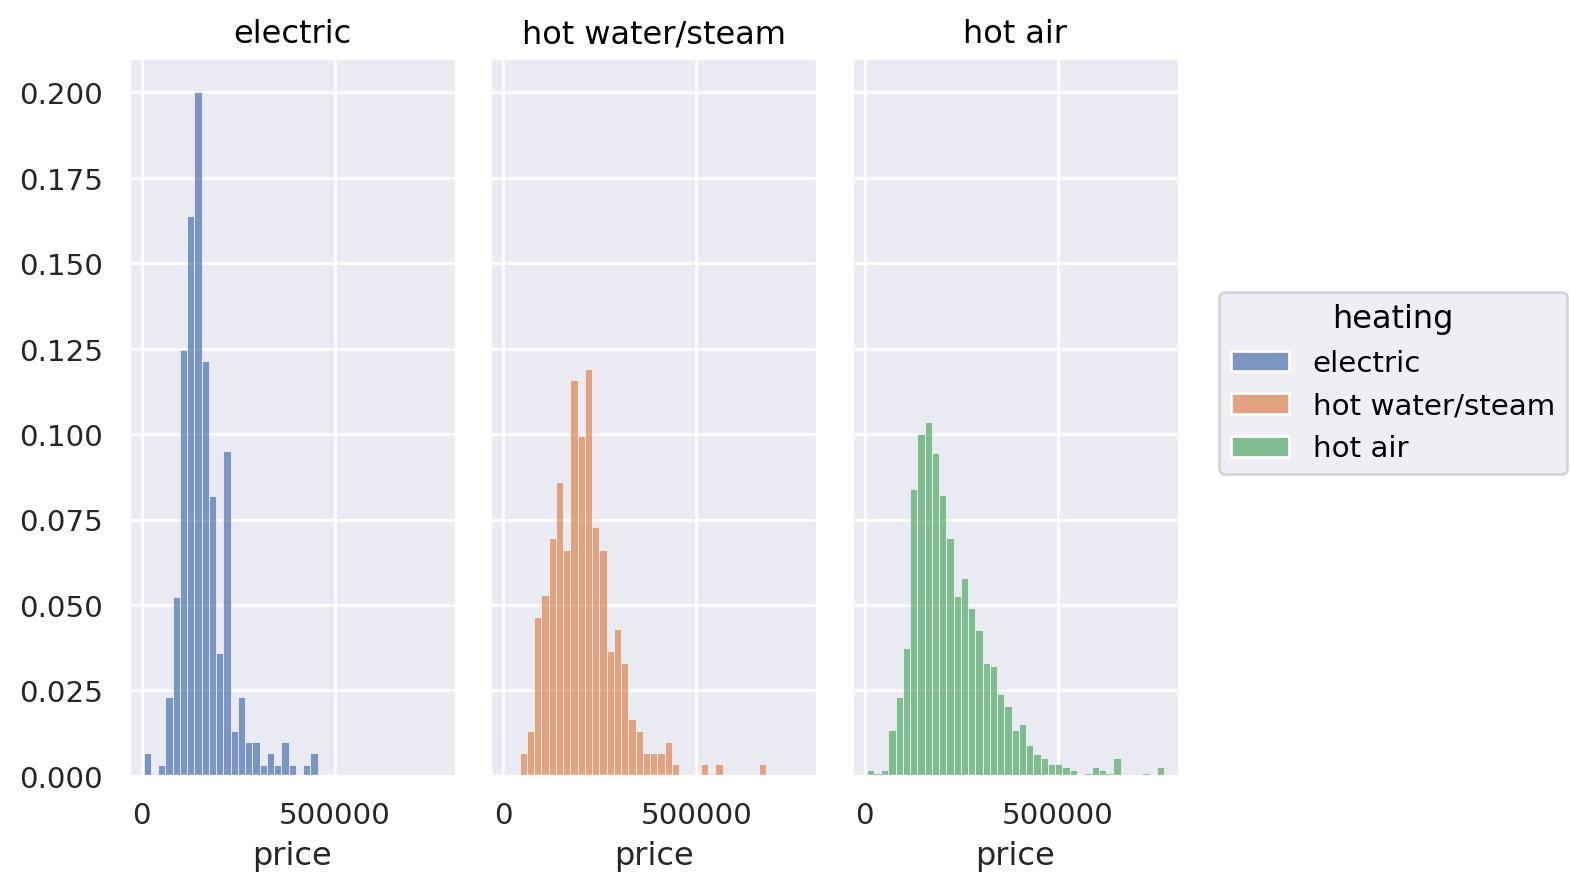

In [ ]:
(
    so.Plot(houses, x="price", color="heating")
    .add(so.Bars(), so.Hist(stat="proportion", common_norm=False))
    .facet("heating")
)

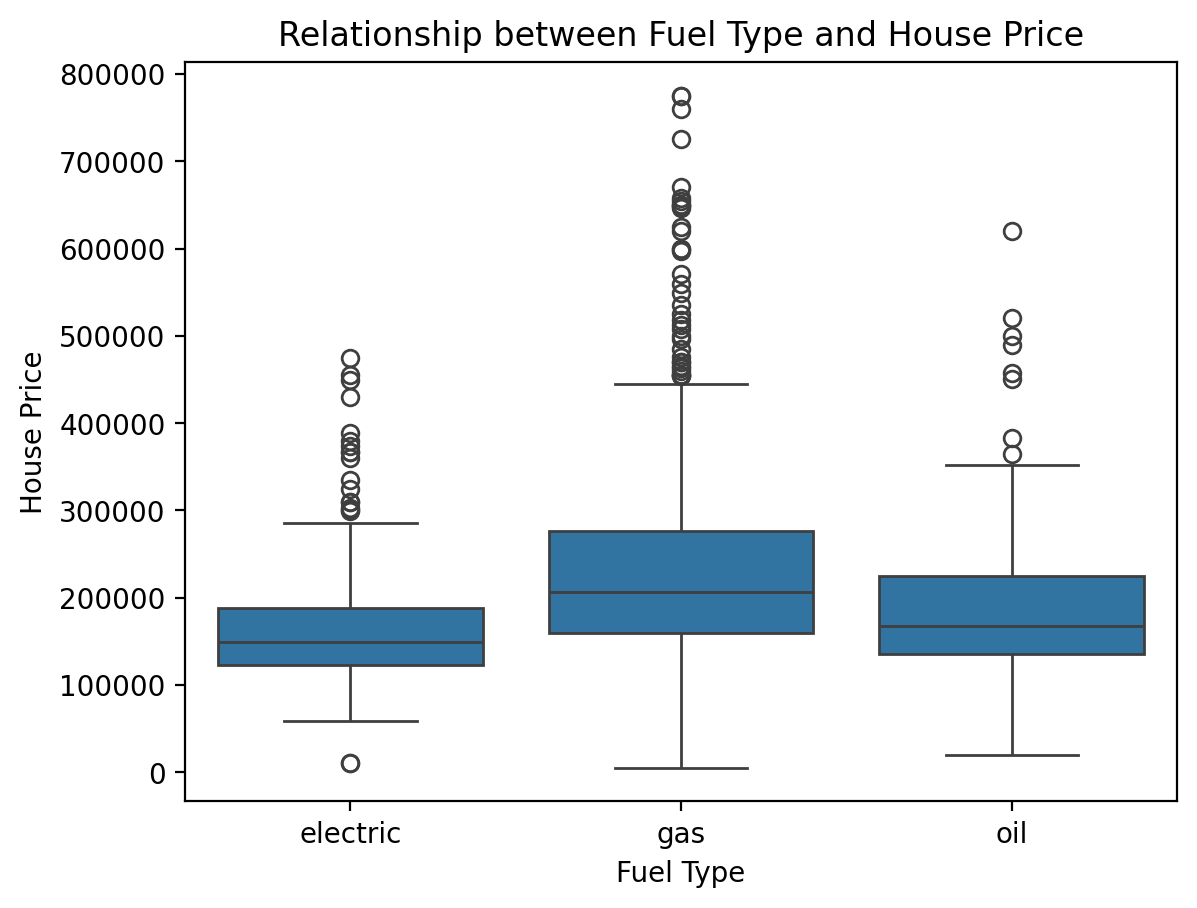

In [ ]:
# Covariation: A categorical and continuous variable
# 어떤 연료를 사용하는지가 집 값을 결정하는데 어떻게 관계를 맺는가?
sns.boxplot(data=houses, x='fuel', y='price')
plt.title('Relationship between Fuel Type and House Price')
plt.xlabel('Fuel Type')
plt.ylabel('House Price')
plt.show()


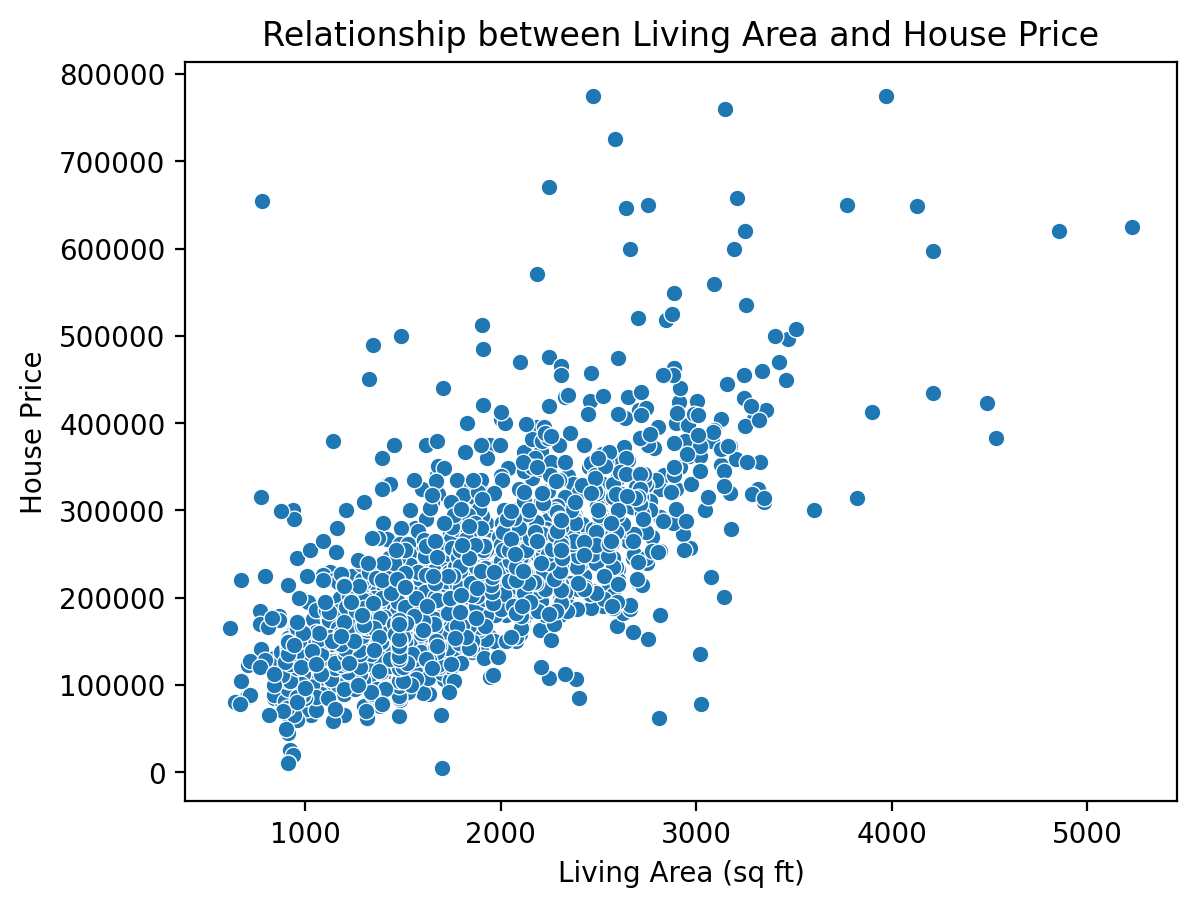

In [ ]:
# Covariation: Two continuous variables
# 집 값에 가장 크게 영향을 주는 요소는? livingArea?
sns.scatterplot(data=houses, x='livingArea', y='price')
plt.title('Relationship between Living Area and House Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('House Price')
plt.show()

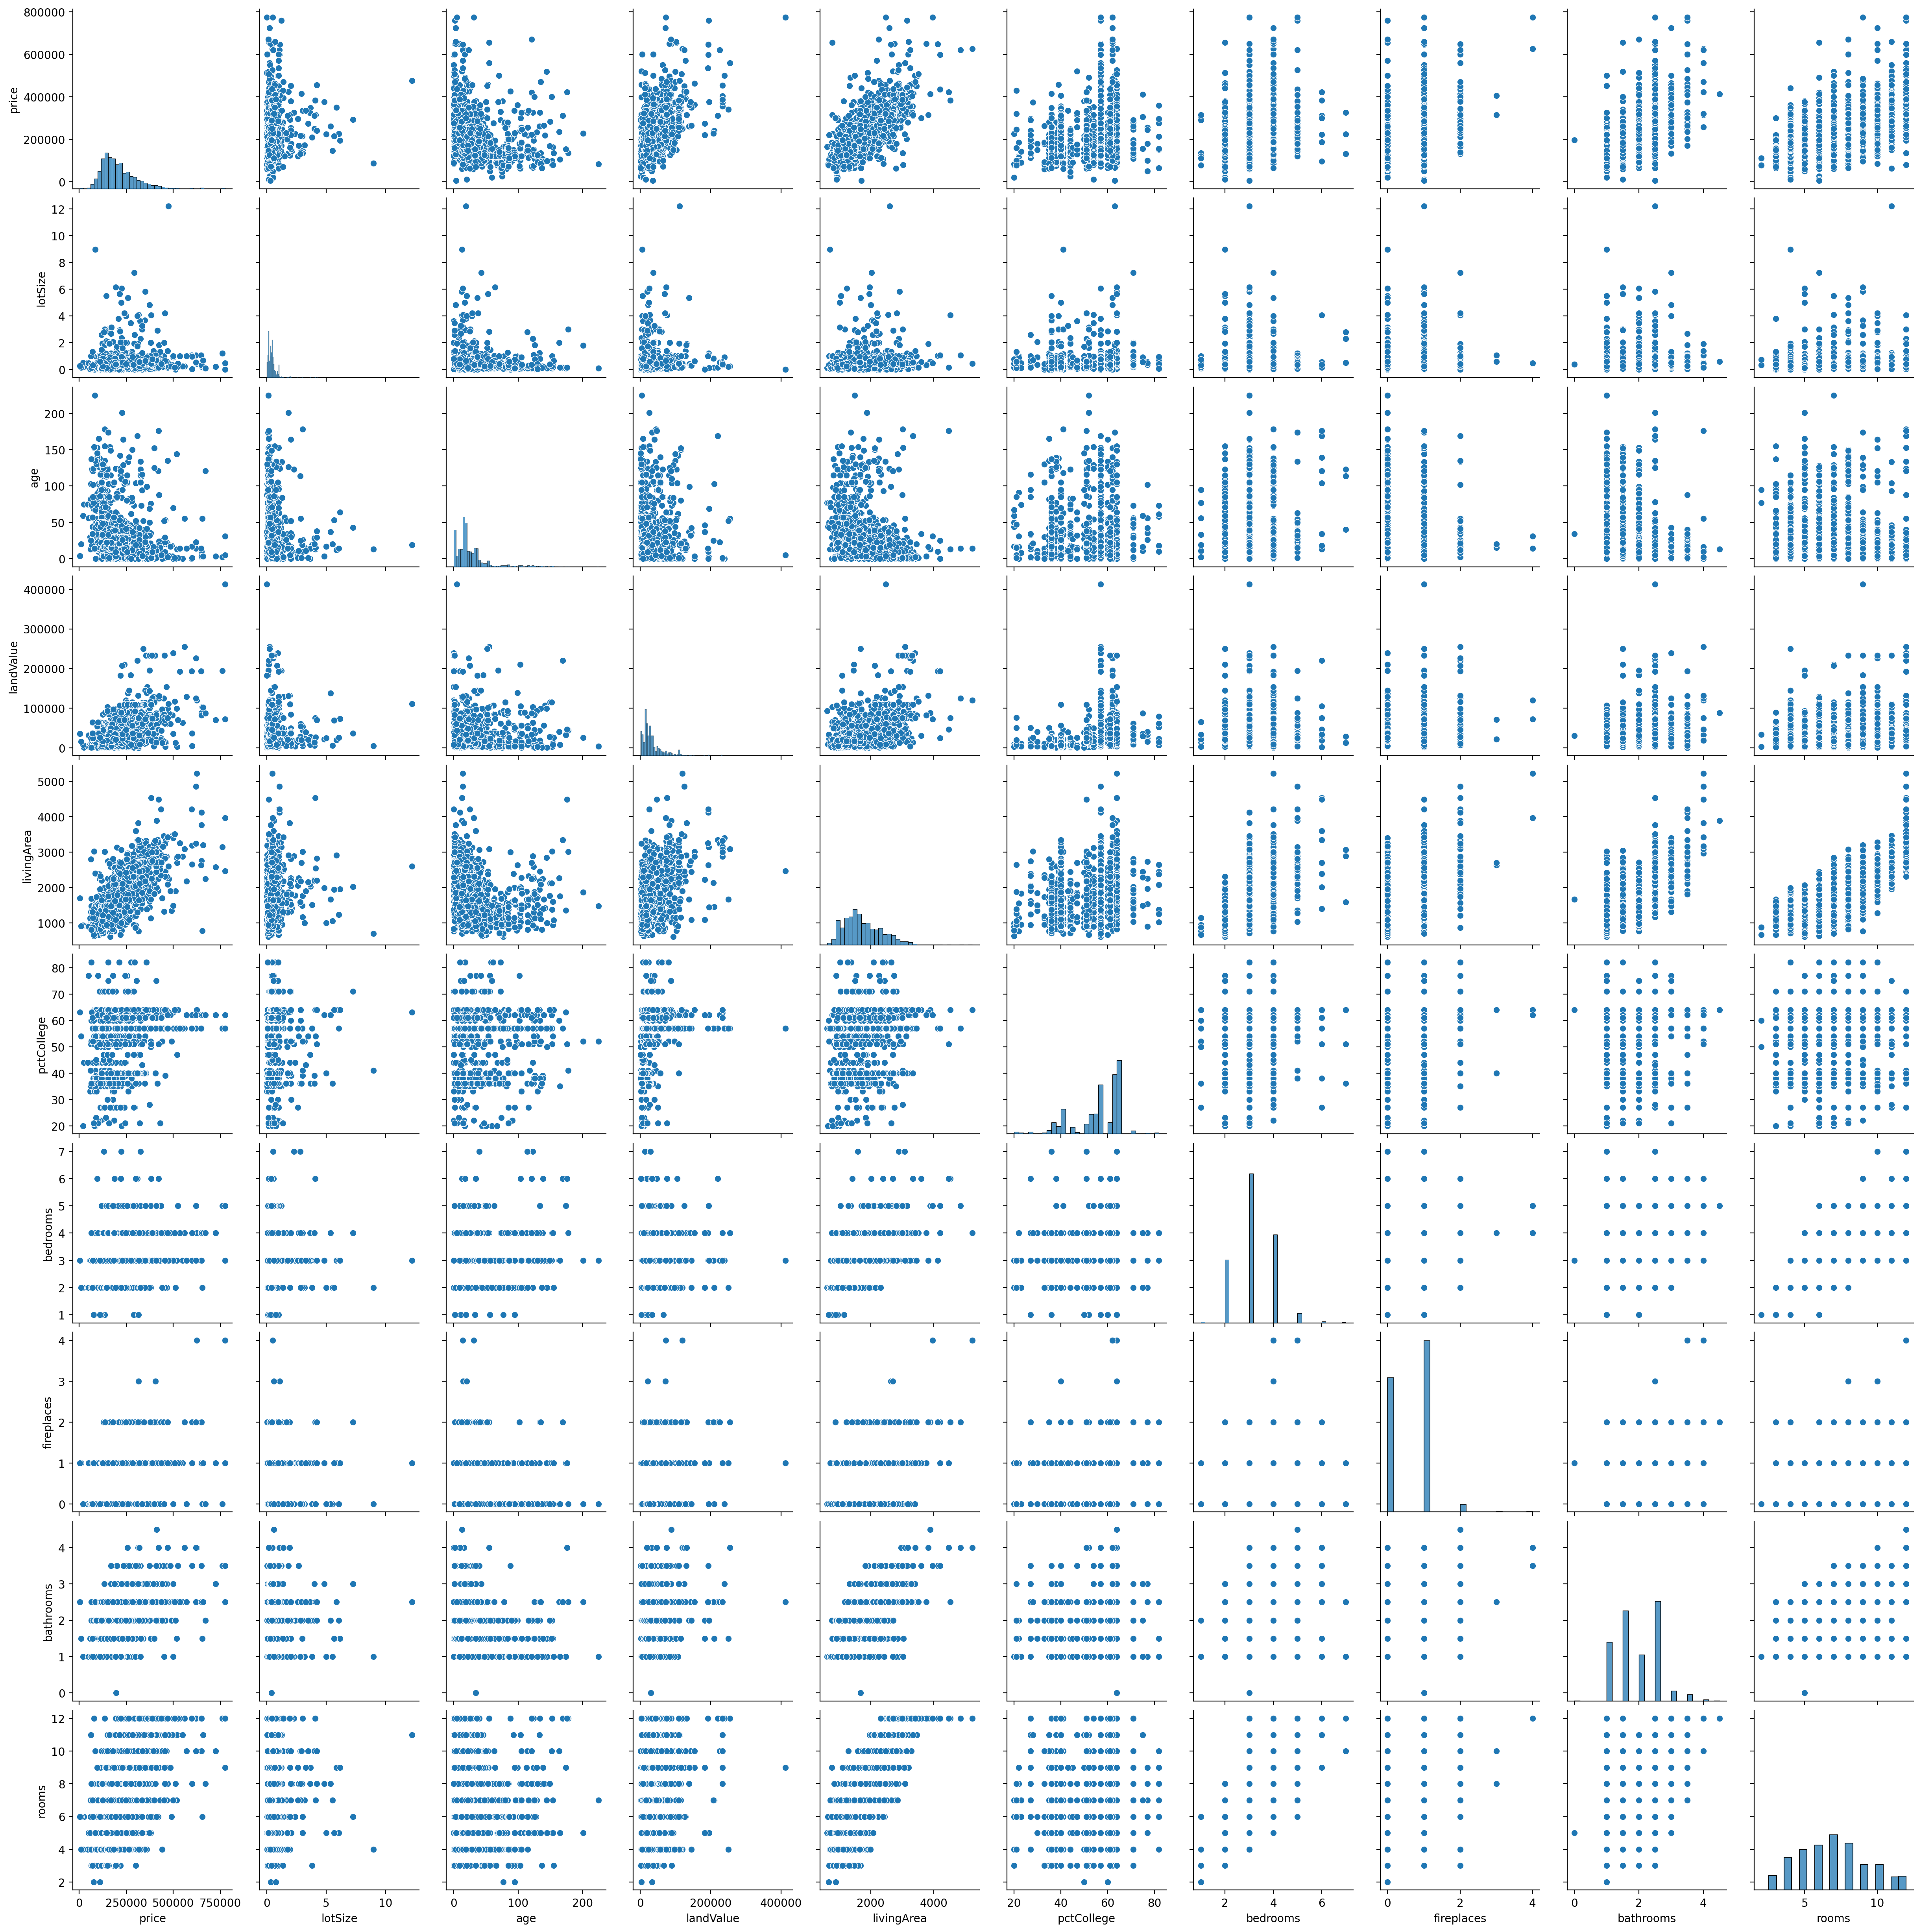

In [ ]:
sns.pairplot(data=houses)